In [2]:
import numpy as np

# Deep neural network (DNN)

> ⚠️ Please prepare `x_train`, `y_train`, `x_test`, `y_test`, `N` before running the DNN from scratch code below.

This notebook demonstrates how to build and train a simple deep neural network (DNN) from scratch using only numpy. You can experiment with different toy datasets and compare results.

1. Dataset1: Structureless toy data
2. Dataset2: Structured data (e.g., clustering by total magnetization)
3. Dataset3: More structured (e.g., linearly separable/non-separable)
4. Dataset4: Real physical data (e.g., Ising MCMC)
5. Compare results (cost/accuracy curves, predictions)

In [3]:
# Dataset parameters 
# Number of features
N = 20
# Number of samples
m = 1000

# Dataset1: structureless toy data
np.random.seed(42)
x_data1 = np.random.choice([1, -1], size=(N, m))
y_data1 = np.zeros((2, m))
y_data1[0, :m//2] = 1
y_data1[1, m//2:] = 1

# Dataset2: structured data (e.g., total magnetization clustering)
np.random.seed(43)
x_data2 = np.random.choice([1, -1], size=(N, m))
y_data2 = np.zeros((2, m))
mag = np.sum(x_data2, axis=0)
y_data2[0, mag < 0] = 1
y_data2[1, mag >= 0] = 1

# Dataset3: more structured data (e.g., linearly separable/non-separable)
np.random.seed(44)
x_data3 = np.random.randn(N, m)
y_data3 = np.zeros((2, m))
mask = np.sum(x_data3, axis=0) > 0
y_data3[0, ~mask] = 1
y_data3[1, mask] = 1

Number of prediction error is: 200
Accuracy of model is: 0.0


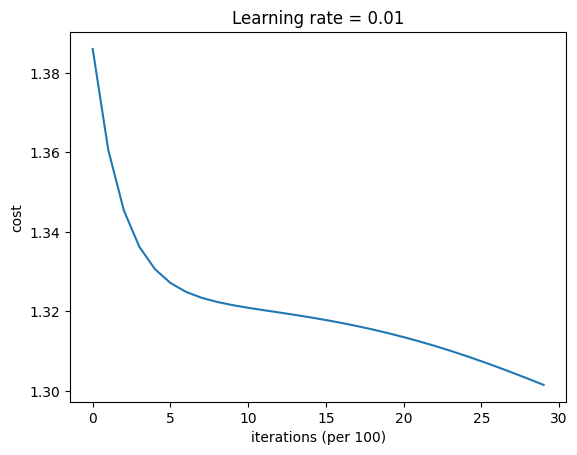

In [5]:
from dnn_trainer_old import activation_list, train_and_evaluate

# training with dataset1
layers_dims = (N, 100, 2)
act_list = activation_list((1, 1))
params, acc, costs = train_and_evaluate(x_data1, y_data1, layers_dims, act_list)

Number of prediction error is: 0
Accuracy of model is: 1.0


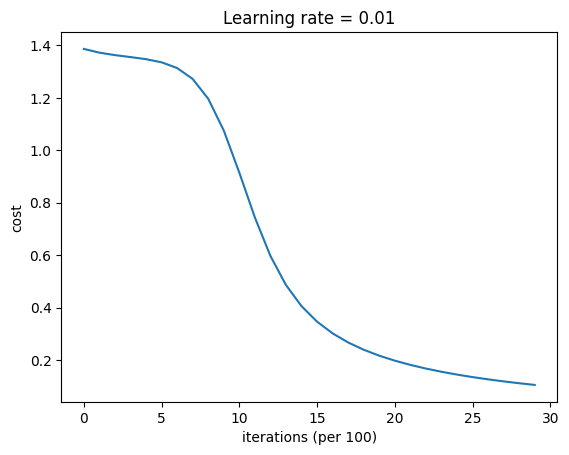

In [7]:
# training with dataset2
layers_dims = (N, 100, 2)
act_list = activation_list((1, 1))
params, acc, costs = train_and_evaluate(x_data2, y_data2, layers_dims, act_list)

Number of prediction error is: 4
Accuracy of model is: 0.98


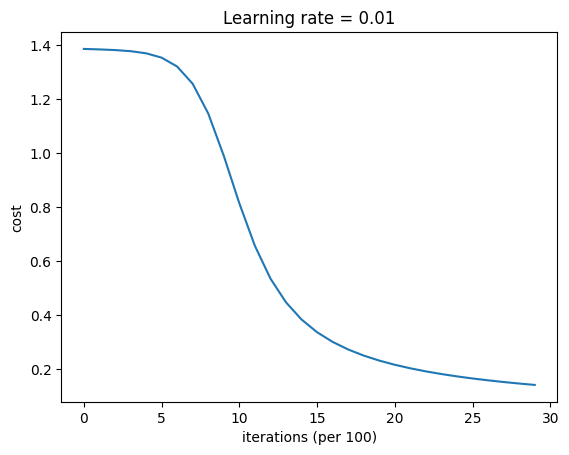

In [6]:
# training with dataset3
layers_dims = (N, 100, 2)
act_list = activation_list((1, 1))
params, acc, costs = train_and_evaluate(x_data3, y_data3, layers_dims, act_list)

## Graph Neural Network (GNN)
The classic GCN layer (Kipf & Welling, 2017): $$ H^{(l+1)} = \sigma\left( \tilde{D}^{-1/2} \tilde{A} \tilde{D}^{-1/2} H^{(l)} W^{(l)} \right) $$

$\tilde{A} = A + I$ (add self-loop)
$\tilde{D}$ is the degree matrix of $\tilde{A}$
$H^{(0)} = X$ (initial node features)
$W^{(l)}$ are trainable weights
$\sigma$ is the activation function (e.g., ReLU)

In [ ]:
# 1. Generate multiple Ising lattice samples (each sample is a graph)
def generate_ising_samples(num_graphs=100):
    graphs = []
    labels = []
    for _ in range(num_graphs):
        # 4個自旋，隨機 +1/-1
        spins = np.random.choice([1, -1], size=(4, 1))
        # 標籤：全同號為鐵磁(1)，否則順磁(0)
        label = 1 if np.all(spins == spins[0]) else 0
        graphs.append(spins)
        labels.append(label)
    return np.array(graphs), np.array(labels)

# Prepare adjacency matrix and features
X = np.array([
    [1.0, 0.5],
    [0.3, 0.2],
    [0.0, 1.0],
    [0.8, 0.7]
])  # shape: (4, 2)

# Prepare adjacency matrix (undirected graph)
A = np.array([
    [0, 1, 0, 0],
    [1, 0, 1, 1],
    [0, 1, 0, 0],
    [0, 1, 0, 0]
], dtype=float)

# Add self-loop and normalize
I = np.eye(A.shape[0])
A_hat = A + I  # Add self-loop

D_hat = np.diag(np.sum(A_hat, axis=1))
D_hat_inv_sqrt = np.linalg.inv(np.sqrt(D_hat))
A_norm = D_hat_inv_sqrt @ A_hat @ D_hat_inv_sqrt  # shape: (4, 4)

# Define GCN layer (single layer)
def relu(x):
    return np.maximum(0, x)

def gcn_layer(X, A_norm, W):
    # X: (num_nodes, in_features)
    # W: (in_features, out_features)
    return relu(A_norm @ X @ W)

# Forward pass (two-layer GCN)
np.random.seed(0)
W0 = np.random.randn(2, 4)  # Weight (in=2, out=4)
W1 = np.random.randn(4, 2)  # Weight (in=4, out=2)

H1 = gcn_layer(X, A_norm, W0)   # First layer
H2 = gcn_layer(H1, A_norm, W1)  # Second layer
print(H2)

The current pure Python GCN code cell only implements forward propagation (inference), not training (no loss function, no gradient descent, no labels or weight updates).

You are just randomly initializing weights W0, W1, then performing two-layer GCN forward propagation and printing the result. This is only inference, not model training.

To actually train the model (so weights are updated based on data and labels), you need:
- Prepare labels (e.g., node classes)
- Define a loss function (e.g., cross-entropy)
- Implement gradient descent (update W0, W1)
- Run multiple epochs for training